# Stock Price Prediction

### Importing neccesary libraries and reading Amazon stock price dataset of 90 days

In [1]:
import pandas as pd

df = pd.read_csv('AMZN.csv')
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2022-06-08  122.610001  123.750000  120.750000  121.180000  121.180000   
1  2022-06-09  119.989998  121.300003  116.099998  116.150002  116.150002   
2  2022-06-10  113.419998  114.500000  109.050003  109.650002  109.650002   
3  2022-06-13  104.190002  106.540001  101.860001  103.669998  103.669998   
4  2022-06-14  104.190002  104.879997  101.430000  102.309998  102.309998   

     Volume  
0  64926600  
1  67029800  
2  87266000  
3  99277700  
4  69728800  


### Applying GRU


         Date        Open        High         Low       Close   Adj Close  \
0  2022-06-08  122.610001  123.750000  120.750000  121.180000  121.180000   
1  2022-06-09  119.989998  121.300003  116.099998  116.150002  116.150002   
2  2022-06-10  113.419998  114.500000  109.050003  109.650002  109.650002   
3  2022-06-13  104.190002  106.540001  101.860001  103.669998  103.669998   
4  2022-06-14  104.190002  104.879997  101.430000  102.309998  102.309998   

     Volume  
0  64926600  
1  67029800  
2  87266000  
3  99277700  
4  69728800  
6/6 [==============================] - 0s 7ms/step


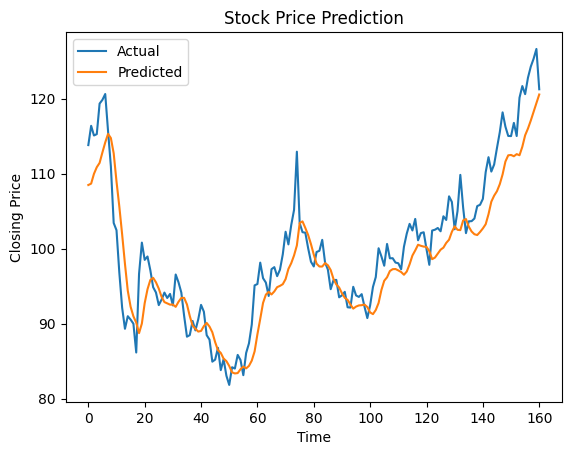

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

# Load the data from CSV
df = pd.read_csv('AMZN.csv')
print(df.head())

# Prepare the data
data = df.filter(['Close'])
dataset = data.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Define the sample size and empty lists for features and labels
look_back = 90
X_train, y_train = [], []

# Loop through the data and append the sub-sequence of 'look_back' days and the next day's closing price
for i in range(look_back, len(scaled_data)):
    X_train.append(scaled_data[i-look_back:i, 0])
    y_train.append(scaled_data[i, 0])

# Convert the X_train and y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the GRU model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(GRU(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Generate predictions
predictions = model.predict(X_train)
predictions = scaler.inverse_transform(predictions)

# Plot the actual and predicted values
plt.plot(dataset[look_back:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()


### GRU with various hyperparameters

         Date        Open        High         Low       Close   Adj Close  \
0  2022-06-08  122.610001  123.750000  120.750000  121.180000  121.180000   
1  2022-06-09  119.989998  121.300003  116.099998  116.150002  116.150002   
2  2022-06-10  113.419998  114.500000  109.050003  109.650002  109.650002   
3  2022-06-13  104.190002  106.540001  101.860001  103.669998  103.669998   
4  2022-06-14  104.190002  104.879997  101.430000  102.309998  102.309998   

     Volume  
0  64926600  
1  67029800  
2  87266000  
3  99277700  
4  69728800  


Epoch 1/50
3/3 [==============================] - 2s 38ms/step - loss: 0.1064
Epoch 2/50
3/3 [==============================] - 0s 40ms/step - loss: 0.0321
Epoch 3/50
3/3 [==============================] - 0s 41ms/step - loss: 0.0128
Epoch 4/50
3/3 [==============================] - 0s 42ms/step - loss: 0.0229
Epoch 5/50
3/3 [==============================] - 0s 39ms/step - loss: 0.0161
Epoch 6/50
3/3 [==============================] - 0s 46ms/step - loss: 0.0093
Epoch 7/50
3/3 [==============================] - 0s 41ms/step - loss: 0.0100
Epoch 8/50
3/3 [==============================] - 0s 39ms/step - loss: 0.0112
Epoch 9/50
3/3 [==============================] - 0s 38ms/step - loss: 0.0096
Epoch 10/50
3/3 [==============================] - 0s 39ms/step - loss: 0.0071
Epoch 11/50
3/3 [==============================] - 0s 39ms/step - loss: 0.0061
Epoch 12/50
3/3 [==============================] - 0s 39ms/step - loss: 0.0063
Epoch 13/50
3/3 [==============================] - 0s 40ms/st

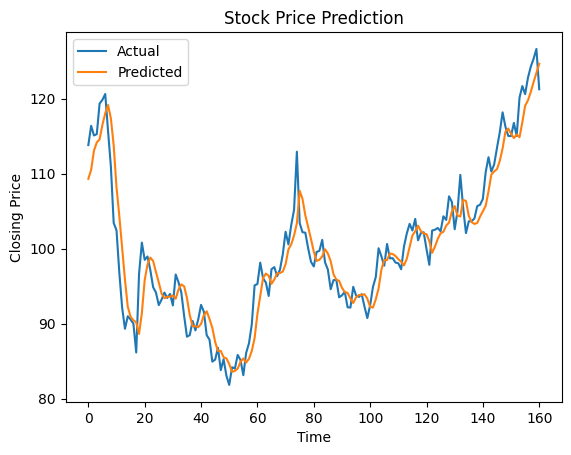

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

# Load the data from CSV
df = pd.read_csv('AMZN.csv')
print(df.head())

# Prepare the data
data = df.filter(['Close'])
dataset = data.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Define the sample size and empty lists for features and labels
look_back = 90
X_train, y_train = [], []

# Loop through the data and append the sub-sequence of 'look_back' days and the next day's closing price
for i in range(look_back, len(scaled_data)):
    X_train.append(scaled_data[i-look_back:i, 0])
    y_train.append(scaled_data[i, 0])

# Convert the X_train and y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Define hyperparameters
gru_units = 50
dense_units = 25
learning_rate = 0.001
batch_size = 64
epochs = 50

# Build the GRU model
model = Sequential()
model.add(GRU(gru_units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(GRU(gru_units, return_sequences=False))
model.add(Dense(dense_units))
model.add(Dense(1))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

# Generate predictions
predictions = model.predict(X_train)
predictions = scaler.inverse_transform(predictions)

# Plot the actual and predicted values
plt.plot(dataset[look_back:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()


### Applying RNN with hyperparameters

         Date        Open        High         Low       Close   Adj Close  \
0  2022-06-08  122.610001  123.750000  120.750000  121.180000  121.180000   
1  2022-06-09  119.989998  121.300003  116.099998  116.150002  116.150002   
2  2022-06-10  113.419998  114.500000  109.050003  109.650002  109.650002   
3  2022-06-13  104.190002  106.540001  101.860001  103.669998  103.669998   
4  2022-06-14  104.190002  104.879997  101.430000  102.309998  102.309998   

     Volume  
0  64926600  
1  67029800  
2  87266000  
3  99277700  
4  69728800  


Epoch 1/50
3/3 [==============================] - 1s 15ms/step - loss: 0.2687
Epoch 2/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0732
Epoch 3/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0191
Epoch 4/50
3/3 [==============================] - 0s 22ms/step - loss: 0.0291
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0136
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0106
Epoch 7/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0133
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0074
Epoch 9/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0096
Epoch 10/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0057
Epoch 11/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0073
Epoch 12/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0044
Epoch 13/50
3/3 [==============================] - 0s 17ms/st

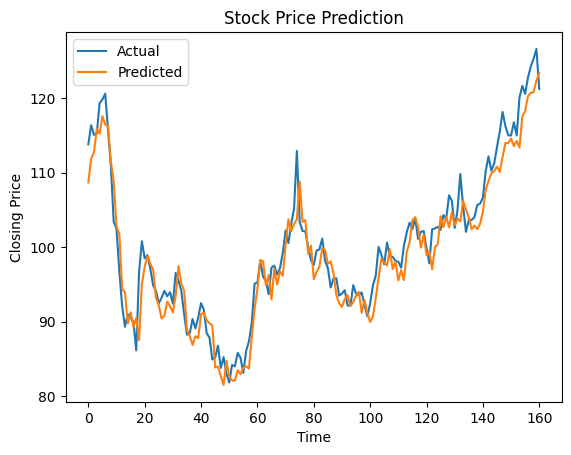

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# Load the data from CSV
df = pd.read_csv('AMZN.csv')
print(df.head())

# Prepare the data
data = df.filter(['Close'])
dataset = data.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Define the sample size and empty lists for features and labels
look_back = 90
X_train, y_train = [], []

# Loop through the data and append the sub-sequence of 'look_back' days and the next day's closing price
for i in range(look_back, len(scaled_data)):
    X_train.append(scaled_data[i-look_back:i, 0])
    y_train.append(scaled_data[i, 0])

# Convert the X_train and y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Define hyperparameters
rnn_units = 50
dense_units = 25
learning_rate = 0.001
batch_size = 64
epochs = 50

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(rnn_units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(rnn_units, return_sequences=False))
model.add(Dense(dense_units))
model.add(Dense(1))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

# Generate predictions
predictions = model.predict(X_train)
predictions = scaler.inverse_transform(predictions)

# Plot the actual and predicted values
plt.plot(dataset[look_back:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()


### Applying LSTM with hyperparameters

         Date        Open        High         Low       Close   Adj Close  \
0  2022-06-08  122.610001  123.750000  120.750000  121.180000  121.180000   
1  2022-06-09  119.989998  121.300003  116.099998  116.150002  116.150002   
2  2022-06-10  113.419998  114.500000  109.050003  109.650002  109.650002   
3  2022-06-13  104.190002  106.540001  101.860001  103.669998  103.669998   
4  2022-06-14  104.190002  104.879997  101.430000  102.309998  102.309998   

     Volume  
0  64926600  
1  67029800  
2  87266000  
3  99277700  
4  69728800  


Epoch 1/50
3/3 [==============================] - 2s 41ms/step - loss: 0.0646
Epoch 2/50
3/3 [==============================] - 0s 47ms/step - loss: 0.0188
Epoch 3/50
3/3 [==============================] - 0s 45ms/step - loss: 0.0221
Epoch 4/50
3/3 [==============================] - 0s 42ms/step - loss: 0.0131
Epoch 5/50
3/3 [==============================] - 0s 44ms/step - loss: 0.0145
Epoch 6/50
3/3 [==============================] - 0s 45ms/step - loss: 0.0142
Epoch 7/50
3/3 [==============================] - 0s 41ms/step - loss: 0.0117
Epoch 8/50
3/3 [==============================] - 0s 43ms/step - loss: 0.0108
Epoch 9/50
3/3 [==============================] - 0s 41ms/step - loss: 0.0110
Epoch 10/50
3/3 [==============================] - 0s 42ms/step - loss: 0.0100
Epoch 11/50
3/3 [==============================] - 0s 43ms/step - loss: 0.0093
Epoch 12/50
3/3 [==============================] - 0s 45ms/step - loss: 0.0092
Epoch 13/50
3/3 [==============================] - 0s 42ms/st

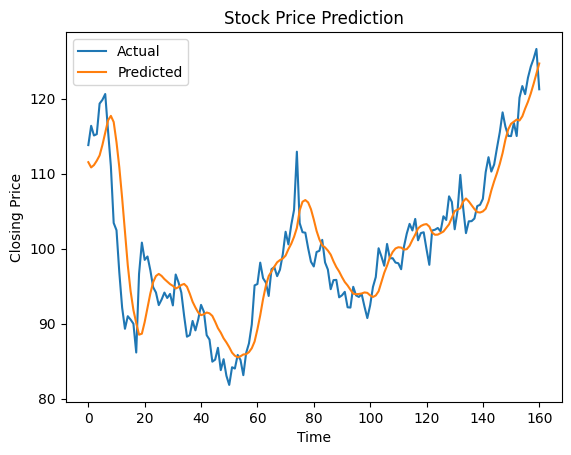

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the data from CSV
df = pd.read_csv('AMZN.csv')
print(df.head())

# Prepare the data
data = df.filter(['Close'])
dataset = data.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Define the sample size and empty lists for features and labels
look_back = 90
X_train, y_train = [], []

# Loop through the data and append the sub-sequence of 'look_back' days and the next day's closing price
for i in range(look_back, len(scaled_data)):
    X_train.append(scaled_data[i-look_back:i, 0])
    y_train.append(scaled_data[i, 0])

# Convert the X_train and y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Define hyperparameters
lstm_units = 50
dense_units = 25
learning_rate = 0.001
batch_size = 64
epochs = 50

# Build the LSTM model
model = Sequential()
model.add(LSTM(lstm_units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(lstm_units, return_sequences=False))
model.add(Dense(dense_units))
model.add(Dense(1))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

# Generate predictions
predictions = model.predict(X_train)
predictions = scaler.inverse_transform(predictions)

# Plot the actual and predicted values
plt.plot(dataset[look_back:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()


### Comparison of GRU, RNN, and LSTM 

         Date        Open        High         Low       Close   Adj Close  \
0  2022-06-08  122.610001  123.750000  120.750000  121.180000  121.180000   
1  2022-06-09  119.989998  121.300003  116.099998  116.150002  116.150002   
2  2022-06-10  113.419998  114.500000  109.050003  109.650002  109.650002   
3  2022-06-13  104.190002  106.540001  101.860001  103.669998  103.669998   
4  2022-06-14  104.190002  104.879997  101.430000  102.309998  102.309998   

     Volume  
0  64926600  
1  67029800  
2  87266000  
3  99277700  
4  69728800  


Epoch 1/50
3/3 [==============================] - 2s 45ms/step - loss: 0.1072
Epoch 2/50
3/3 [==============================] - 0s 38ms/step - loss: 0.0265
Epoch 3/50
3/3 [==============================] - 0s 40ms/step - loss: 0.0145
Epoch 4/50
3/3 [==============================] - 0s 39ms/step - loss: 0.0235
Epoch 5/50
3/3 [==============================] - 0s 39ms/step - loss: 0.0144
Epoch 6/50
3/3 [==============================] - 0s 38ms/step - loss: 0.0076
Epoch 7/50
3/3 [==============================] - 0s 37ms/step - loss: 0.0091
Epoch 8/50
3/3 [==============================] - 0s 39ms/step - loss: 0.0105
Epoch 9/50
3/3 [==============================] - 0s 41ms/step - loss: 0.0088
Epoch 10/50
3/3 [==============================] - 0s 39ms/step - loss: 0.0062
Epoch 11/50
3/3 [==============================] - 0s 38ms/step - loss: 0.0053
Epoch 12/50
3/3 [==============================] - 0s 38ms/step - loss: 0.0058
Epoch 13/50
3/3 [==============================] - 0s 38ms/st

Epoch 1/50
3/3 [==============================] - 1s 15ms/step - loss: 0.0960
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0303
Epoch 3/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0162
Epoch 4/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0165
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0184
Epoch 6/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0153
Epoch 7/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0126
Epoch 8/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0078
Epoch 9/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0057
Epoch 10/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0045
Epoch 11/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0040
Epoch 12/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0041
Epoch 13/50
3/3 [==============================] - 0s 17ms/st

Epoch 1/50
3/3 [==============================] - 2s 39ms/step - loss: 0.1044
Epoch 2/50
3/3 [==============================] - 0s 41ms/step - loss: 0.0265
Epoch 3/50
3/3 [==============================] - 0s 46ms/step - loss: 0.0245
Epoch 4/50
3/3 [==============================] - 0s 41ms/step - loss: 0.0197
Epoch 5/50
3/3 [==============================] - 0s 41ms/step - loss: 0.0124
Epoch 6/50
3/3 [==============================] - 0s 41ms/step - loss: 0.0143
Epoch 7/50
3/3 [==============================] - 0s 41ms/step - loss: 0.0151
Epoch 8/50
3/3 [==============================] - 0s 41ms/step - loss: 0.0124
Epoch 9/50
3/3 [==============================] - 0s 48ms/step - loss: 0.0107
Epoch 10/50
3/3 [==============================] - 0s 43ms/step - loss: 0.0112
Epoch 11/50
3/3 [==============================] - 0s 42ms/step - loss: 0.0112
Epoch 12/50
3/3 [==============================] - 0s 42ms/step - loss: 0.0100
Epoch 13/50
3/3 [==============================] - 0s 41ms/st

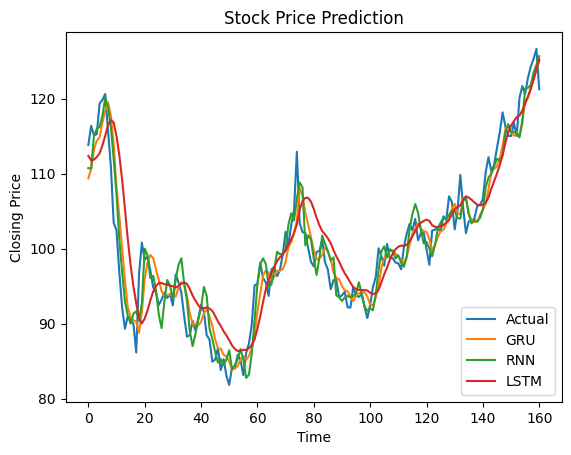

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, SimpleRNN, LSTM, Dense
import matplotlib.pyplot as plt

# Load the data from CSV
df = pd.read_csv('AMZN.csv')
print(df.head())

# Prepare the data
data = df.filter(['Close'])
dataset = data.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Define the sample size and empty lists for features and labels
look_back = 90
X_train, y_train = [], []

# Loop through the data and append the sub-sequence of 'look_back' days and the next day's closing price
for i in range(look_back, len(scaled_data)):
    X_train.append(scaled_data[i-look_back:i, 0])
    y_train.append(scaled_data[i, 0])

# Convert the X_train and y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Define hyperparameters
gru_units = 50
rnn_units = 50
lstm_units = 50
dense_units = 25
learning_rate = 0.001
batch_size = 64
epochs = 50

# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(gru_units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(GRU(gru_units, return_sequences=False))
gru_model.add(Dense(dense_units))
gru_model.add(Dense(1))
gru_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
gru_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)
gru_predictions = gru_model.predict(X_train)
gru_predictions = scaler.inverse_transform(gru_predictions)

# Build the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(rnn_units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
rnn_model.add(SimpleRNN(rnn_units, return_sequences=False))
rnn_model.add(Dense(dense_units))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
rnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)
rnn_predictions = rnn_model.predict(X_train)
rnn_predictions = scaler.inverse_transform(rnn_predictions)

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(lstm_units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(lstm_units, return_sequences=False))
lstm_model.add(Dense(dense_units))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
lstm_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)
lstm_predictions = lstm_model.predict(X_train)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Plot the actual and predicted values for all models
plt.plot(dataset[look_back:], label='Actual')
plt.plot(gru_predictions, label='GRU')
plt.plot(rnn_predictions, label='RNN')
plt.plot(lstm_predictions, label='LSTM')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()


#### Blue line in the Graph represents Actual Stock price

#### You can See the prediction graph for Amzon Stock price with GRU in yellow, RNN in Green and LSTM in red

## RNN showing almost accurate prediction